In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
import Model
import warnings

warnings.simplefilter('ignore', FutureWarning)

if __name__ == "__main__":
	t0 = time.time()
	featureList = ['EPS Growth', 'Volatility 180 D', 'Trailing EPS', 'Price to Cash Flow', 'EPS', 'Volume', 'Return on Assets', 'Price to Book', 'Dividend Yield', 'Total Debt to Total Equity', 'Return on Invested Capital', 'Return on Common Equity']
	train, validate, test = Model.splitData(300,3,12)
	sector = "Consumer Discretionary"
	randForest = Model.buildWithIndexesTripleClass(modelType = Model.randomForestClassifier, indexes = train, target= 'Rate of Return', features = featureList, featureLength = 12,\
									targetLength = 3, sector = sector, percentileTarget = 90, percentileAvoid = 10, verbose = True)
	print("Labels: ")
	print(randForest.classes_)
	print("Importances: ")
	print(randForest.feature_importances_)

[-190 -184 -178 -280  -31  -25  -49 -196  -97 -232  -46 -259 -154  -73 -175
 -109 -262 -148 -133 -217 -181  -16 -139 -223 -151 -226 -220 -214 -205 -124
 -121 -271  -58 -202 -211 -160 -295  -40  -43 -169 -130  -34 -157 -112 -136
 -127 -241  -55 -172 -256 -193  -67 -100 -277  -76 -115 -208]
[ -19 -292 -265 -145  -88 -250 -199 -106 -142 -235 -163 -103 -253  -82 -301
 -289 -166 -298 -229]
[-238 -274 -283 -244 -286 -247  -85  -70  -79 -268 -187  -94  -28  -64  -52
  -22 -118  -61  -91  -37]
Index: -190
0.0 percent complete with preparing data.
Index: -184
1.7543859649122806 percent complete with preparing data.
Index: -178
3.508771929824561 percent complete with preparing data.
Index: -280
5.263157894736842 percent complete with preparing data.
Index: -31
7.017543859649122 percent complete with preparing data.
Index: -25
8.771929824561402 percent complete with preparing data.
Index: -49
10.526315789473683 percent complete with preparing data.
Index: -196
12.280701754385964 percent complete 

In [2]:
precisions = {'seen':{}, 'above10':{}, 'above75':{}, 'above50':{}, 'above25':{}, 'above90':{}}
betterThan = {}
for prob in range(0,100,5):
	precisions['seen'][prob] = 0
	precisions['above10'][prob] = 0
	precisions['above75'][prob] = 0
	precisions['above50'][prob] = 0
	precisions['above25'][prob] = 0
	precisions['above90'][prob] = 0
for i in validate:
	addedStocks, probabilities = Model.predict_probabilities(randForest, startIndex = i, endIndex = i+11, features = featureList, sector = sector)
	actual = []
	for prob in range(0,100,5):
		betterThan[prob] = []
	for stock in addedStocks:
		actual.append(Model.rateOfReturn(Model.retrieveData(stock, 'Last Price', i+12, i+14, [])))
	for i in range(len(probabilities)):
		for prob in range(0,100,5):
			if probabilities[i][1] > prob / 100:
				betterThan[prob].append(1)
			else:
				betterThan[prob].append(0)
	for prob in range(0,100,5):
		if sum(betterThan[prob]) > 0:
			precisions['above10'][prob] = (Model.precision(Model.getPercentile(actual, 10),betterThan[prob]) * len(betterThan[prob]) + precisions['above10'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above75'][prob] = (Model.precision(Model.getPercentile(actual, 75),betterThan[prob]) * len(betterThan[prob]) + precisions['above75'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above50'][prob] = (Model.precision(Model.getPercentile(actual, 50), betterThan[prob]) * len(betterThan[prob]) + precisions['above50'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above25'][prob] = (Model.precision(Model.getPercentile(actual, 25), betterThan[prob]) * len(betterThan[prob]) + precisions['above25'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above90'][prob] = (Model.precision(Model.getPercentile(actual, 90), betterThan[prob]) * len(betterThan[prob]) + precisions['above90'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['seen'][prob] = precisions['seen'][prob] + len(betterThan[prob])
x = []
y90 = []
y75 = []
y50 = []
y25 = []
y10 = []
counts = []
for prob in range(0,100,5):
	print(str(prob) + " above 90th percentile: " + str(precisions['above90'][prob]))
	print(str(prob) + " above 75th percentile: " + str(precisions['above75'][prob]))
	print(str(prob) + " above 50th percentile: " + str(precisions['above50'][prob]))
	print(str(prob) + " above 25th percentile: " + str(precisions['above25'][prob]))
	print(str(prob) + " above 10th percentile: " + str(precisions['above10'][prob]))
	counts.append(sum(betterThan[prob]))
	if (precisions['above10'][prob]) > 0:
		y90.append(precisions['above90'][prob])
		y75.append(precisions['above75'][prob])
		y50.append(precisions['above50'][prob])
		y25.append(precisions['above25'][prob])
		y10.append(precisions['above10'][prob])
		x.append(prob)

print(time.time() - t0, "seconds wait time")

0 above 90th percentile: 0.0986186809496
0 above 75th percentile: 0.239772215761
0 above 50th percentile: 0.476462498433
0 above 25th percentile: 0.713998719566
0 above 10th percentile: 0.856573000179
5 above 90th percentile: 0.123138941187
5 above 75th percentile: 0.276129725743
5 above 50th percentile: 0.501570416909
5 above 25th percentile: 0.722583865773
5 above 10th percentile: 0.865118965435
10 above 90th percentile: 0.144099098572
10 above 75th percentile: 0.300331015805
10 above 50th percentile: 0.509264923984
10 above 25th percentile: 0.724178840653
10 above 10th percentile: 0.860759058563
15 above 90th percentile: 0.166103040046
15 above 75th percentile: 0.325182921
15 above 50th percentile: 0.520495920015
15 above 25th percentile: 0.726399044982
15 above 10th percentile: 0.846467494695
20 above 90th percentile: 0.186470995919
20 above 75th percentile: 0.352211855302
20 above 50th percentile: 0.543511774229
20 above 25th percentile: 0.723283436394
20 above 10th percentile: 0.

Counts: 
[165, 106, 71, 57, 49, 43, 39, 37, 32, 29, 24, 21, 16, 13, 13, 8, 6, 4, 2, 0]


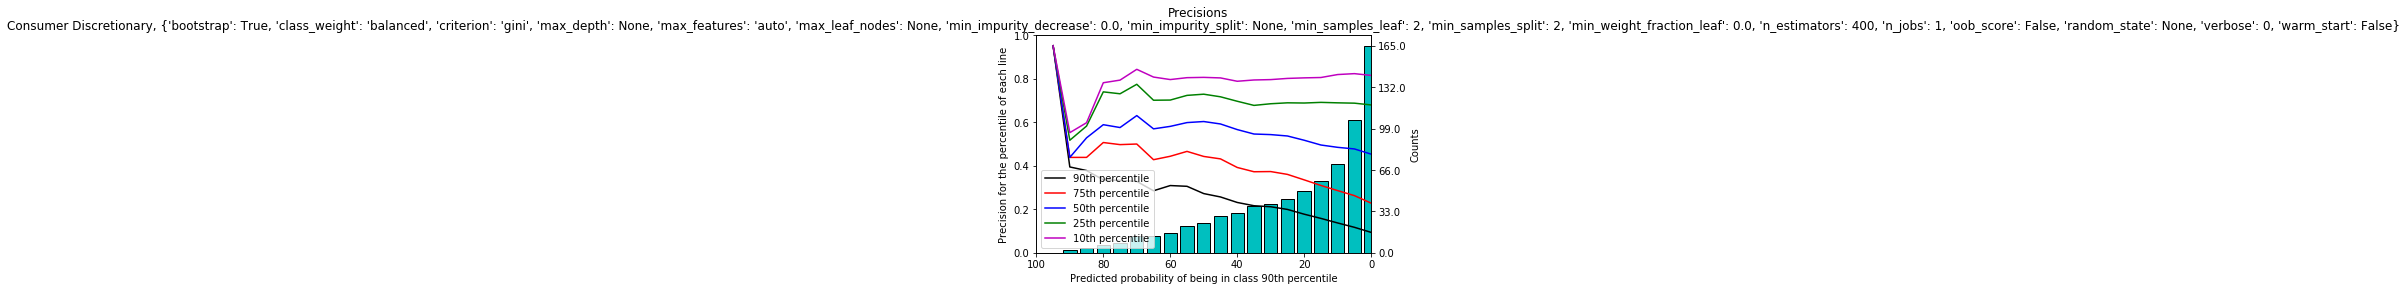

In [3]:
print("Counts: ")
print(counts)
fig = plt.figure()
axes = plt.gca()
axes.set_xlim([0,100])
axes.set_xlim([0,100])
plt.suptitle("Precisions")
plt.title(sector + ", " + str(randForest.get_params()))
plt.xlabel('Predicted probability of being in class 90th percentile')
plt.ylabel('Precision for the percentile of each line')
axes.invert_xaxis()
bar = axes.twinx()
rects = bar.bar(x = list(range(0,100,5)), height = list(map(lambda x: x/max(counts),counts)), width = 4, color = 'c', linestyle = 'solid', edgecolor = 'k', zorder = -1)
bar.set_yticklabels(list(map(lambda x: x * max(counts) / 5, range(0,6,1))))
bar.set_ylabel('Counts', color = 'k')
plt.plot(x, y90, color = 'k', label = "90th percentile")
plt.plot(x, y75, color = 'r', label = "75th percentile")
plt.plot(x, y50, color = 'b', label = "50th percentile")
plt.plot(x, y25, color = 'g', label = "25th percentile")
plt.plot(x, y10, color = 'm', label = "10th percentile")
plt.legend()

In [4]:
fig.savefig(str(time.time()) + 'test.jpg', dpi=900)
plt.show()

Feature ranking:
1. Volatility 180 D (0.119794)
2. EPS Growth (0.095695)
3. Volume (0.093740)
4. Price to Cash Flow (0.093175)
5. Price to Book (0.092705)
6. Return on Invested Capital (0.089574)
7. Return on Common Equity (0.087744)
8. Trailing EPS (0.084414)
9. EPS (0.083533)
10. Total Debt to Total Equity (0.079619)
11. Dividend Yield (0.040075)
12. Return on Assets (0.039932)


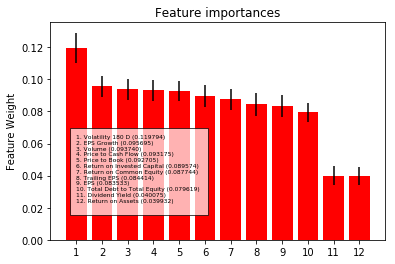

In [5]:
# adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = randForest.feature_importances_
std = np.std([est.feature_importances_ for est in randForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
textString = ''
for f in range(len(featureList)):
    print("%d. %s (%f)" % (f + 1, featureList[indices[f]], importances[indices[f]]))
    textString += "%d. %s (%f) \n" % (f + 1, featureList[indices[f]], importances[indices[f]])

# Plot the feature importances of the forest
fig2 = plt.figure()
plt.title("Feature importances")
plt.bar(range(len(featureList)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(len(featureList)), range(1,len(featureList)+1))
plt.xlim([-1, len(featureList)])
plt.ylabel('Feature Weight')
plt.text(0, 0.02, textString,
        bbox={'facecolor':'white', 'alpha':0.7, 'pad':6}, fontsize=6)
fig2.savefig(str(time.time()) + 'feature_importances.jpg', dpi=900)
plt.show()